<a href="https://colab.research.google.com/github/analyst-rhie/self-taught_machine_learning_code/blob/main/7%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer :
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [6]:
model = model_fn()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


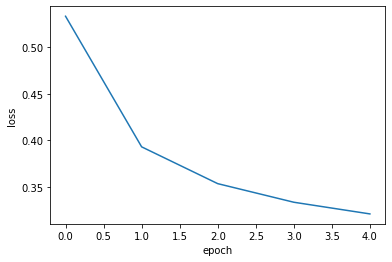

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

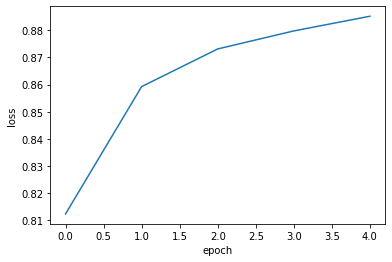

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Text(0, 0.5, 'loss')

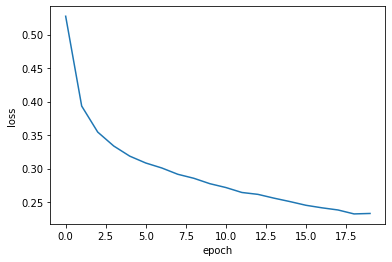

In [14]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history=model.fit(train_scaled, train_target, epochs = 20, verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [19]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20 , verbose = 0,
                    validation_data=(val_scaled, val_target))

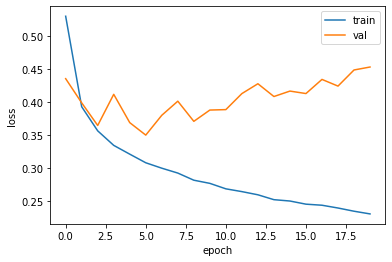

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

In [24]:
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose=0,
                    validation_data=(val_scaled,val_target))

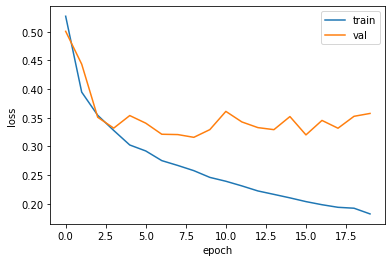

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

In [26]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy',metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20 , verbose= 0 , 
                    validation_data = (val_scaled, val_target))

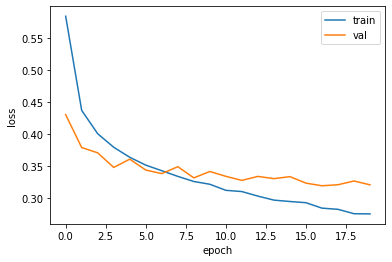

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

In [42]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',
              metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, verbose=0,
                    validation_data= (val_scaled, val_target))

In [43]:
model.save_weights('model-weights.h5')

model.save('model-whole.h5')

In [34]:
!ls -al *.h5

-rw-r--r-- 1 root root 332480 Aug  9 01:19 model-weights.h5
-rw-r--r-- 1 root root 981736 Aug  9 01:19 model-while.h5


In [37]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [45]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

0.8798333333333334


In [44]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8798


[0.33500102162361145, 0.8798333406448364]

In [47]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs = 20, verbose=0,
          validation_data =(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [48]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3285 - accuracy: 0.8855


[0.3284766972064972, 0.8855000138282776]

In [50]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs = 20, verbose =0,
                    validation_data=(val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])


In [51]:
print(early_stopping_cb.stopped_epoch)

7


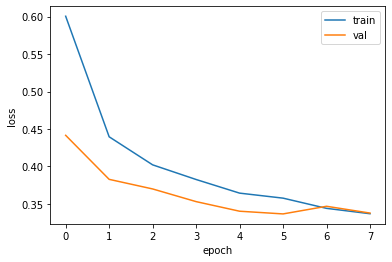

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

In [53]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 894us/step - loss: 0.3365 - accuracy: 0.8772


[0.3365219831466675, 0.8771666884422302]